## How to run the code:

### Requirements:
None.

### Instructions:
The code written Python 3.8 and stored in the `neural_network_circular_gol` folder.

The code can be run only from the `main.py` explicitly inside the `neural_network_circular_gol` folder without any configuration at all (it includes virtual environment which contains Python 3.8).

### To run the code from the folder explicitly:

1. Open Terminal or CMD and navigate to `neural_network_circular_gol` folder.

2. Run the next command:

> Windows:
<br>`.\venv\bin\python3 main.py`

> Linux / MacOS:
<br>`./venv/bin/python3 main.py`

**OR** 
If you have `PyCharm` installed, just run the `main.py` file from the `PyCharm` editor.

## Neural Network Prerequisites

### Game of Life Configurations

**Bounding Box Size:** The value which we choose to bound the configuration size in the neural network is **60x60**.<br>
Meaning the size of configuration is **60x60** integer matrix, which consists **1's** for living cells and **0's** for dead cells.<br>
Every configuration in the whole work will be fixed to this size.<br>

Example configuration in visible format:<br><br>
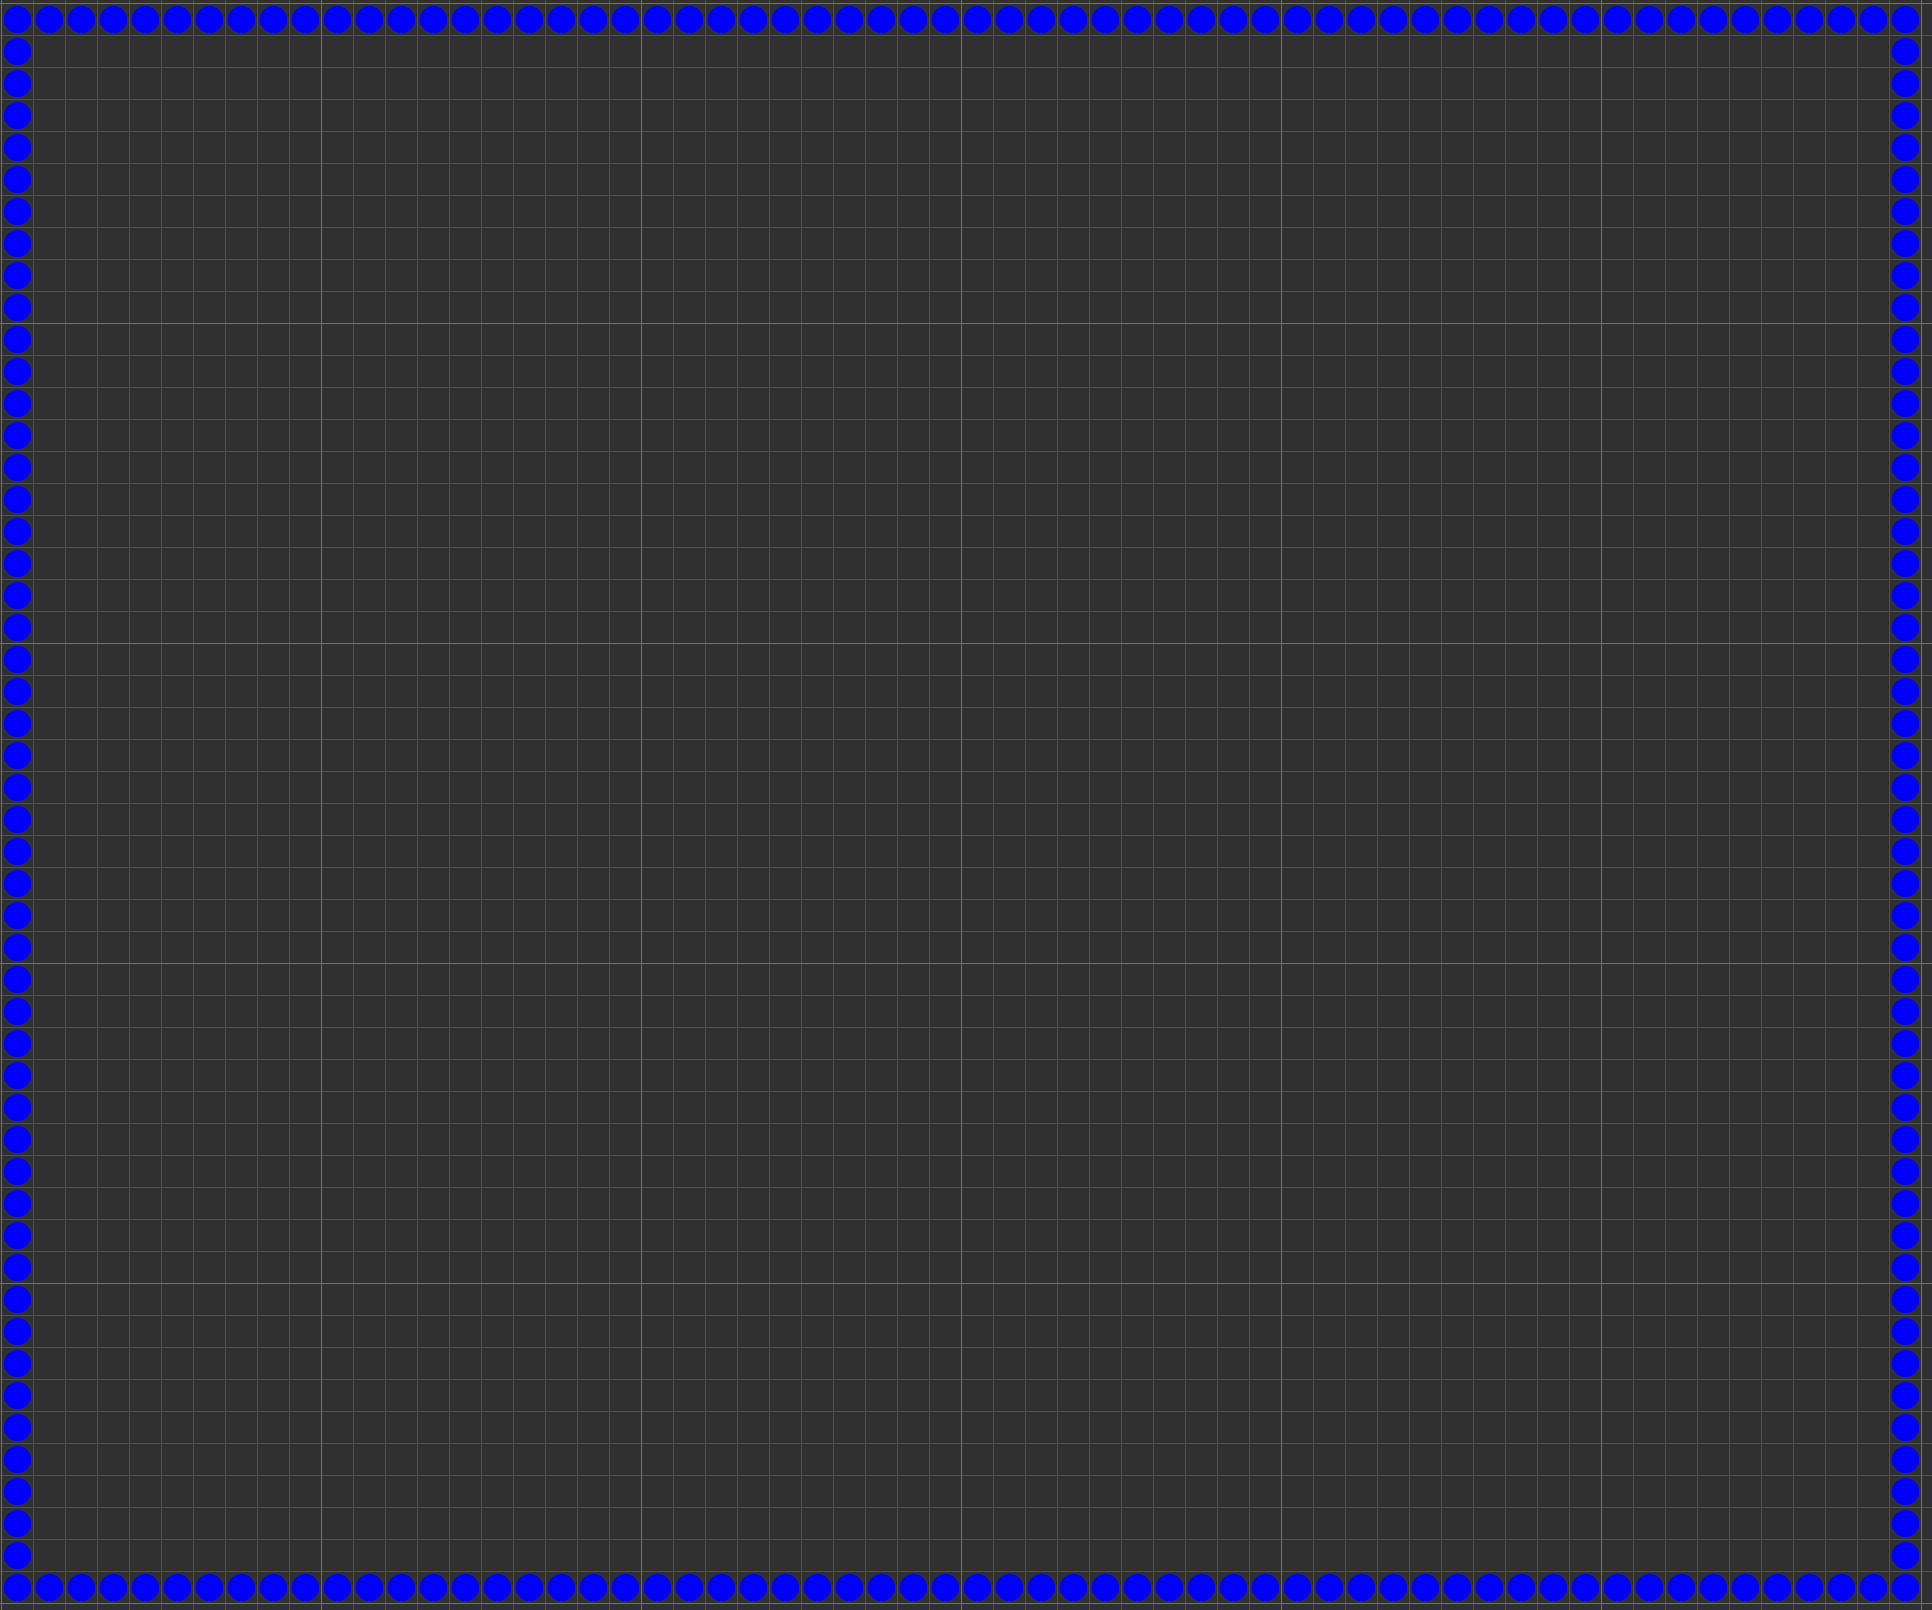

<br><br>
The same example of configuration in matrix format:<br><br>
```
[
    [1, 1, 1, 1, ..., 1, 1, 1, 1]
    [1, 0, 0, 0, ..., 0, 0, 0, 1] 
    [1, 0, 0, 0, ..., 0, 0, 0, 1]
                 ...
    [1, 0, 0, 0, ..., 0, 0, 0, 1]
    [1, 0, 0, 0, ..., 0, 0, 0, 1]
    [1, 1, 1, 1, ..., 1, 1, 1, 1]
]
```

**Game of Life Simulation Engine** - For simulating various configurations in the Game of Life, we used `seagull` library, which helps simulating the GOL rules in easy way.

**Game of Life Board Size** - The board size for the simulations is **200x200**.

**Game of Life Simulation Generations Limitation** - We limit ourselves to **400** generations for simulation because of runtime limitation (Greater generations number affect runtime because the size of each configuration is big).

### Dataset Generation and Configurations

The dataset for the neural network is consisting two mechanisms, each for generating an oscillators or non oscillators configurations for the dataset.<br>
The class which handles all the dataset operations can be found inside the `neural_network_circular_gol` folder in the file `dataset_generator.py`.<br>

The mechanisms are:
1. **Extraction of oscillators from the Official Game of Life Wiki** - The dataset generator reads the HTML file in the oscillators categories page at the official Game of Life wiki site and iterate over all the oscillators pages.<br>
For each oscillator page, the wiki contains a link to `.cells` file, which represents the configuration of the oscillator in the GOL.<br>
The dataset generator reads that file for each oscillators and build from it the needed configuration for the oscillator.<br>
There is some cases that oscillators will not be included due to the limitation of the bounding box size of the configurations for the game of life the neural network used.<br><br>
2. **Generation of non oscillators configurations** - The dataset generator generates non oscillators configurations by the following procedure:<br>
Creating a random configuration in fixed bounding box size, running it in GOL simulation for predefined generations, and validating that the configuration is not oscillator.<br>
The validation for oscillator made by visiting the simulation history of the configuration, and checking out if the starting state of the configuration is found in the next generations - if so, the configuration is an oscillator (If not, we reached the limit of the predefined generation number - we can assume that the configuration is not oscillator).<br>
The above procedure is happening until we reach number of non oscillators configurations as the number of oscillators the oscillators dataset has.<br><br>

**Batches** - The dataset generation also support batch separation for better learning ability to the neural network model.<br>
We can separate the dataset to multiple batches, which are randomized with both classifications (oscillators and non oscillators) to reduce overfitting to the train dataset for the model.<br>

## Neural Network Architecture

The neural network consists of 3 layers:<br>
1. **Input Layer** - Containing **3600** input features as the predefined configuration size of the Game of Life.<br>
The input received from the configurations of the dataset, which represents **60x60** matrix but in flat array format.
2. **Hidden Layer** - Containing **512** Neurons which connected to each input feature of the input layer.
3. **Output Layer** - Containing **2** Neurons which connected to each neuron of the hidden layer.
<br><br>

Graph which represent the network:<br><br>
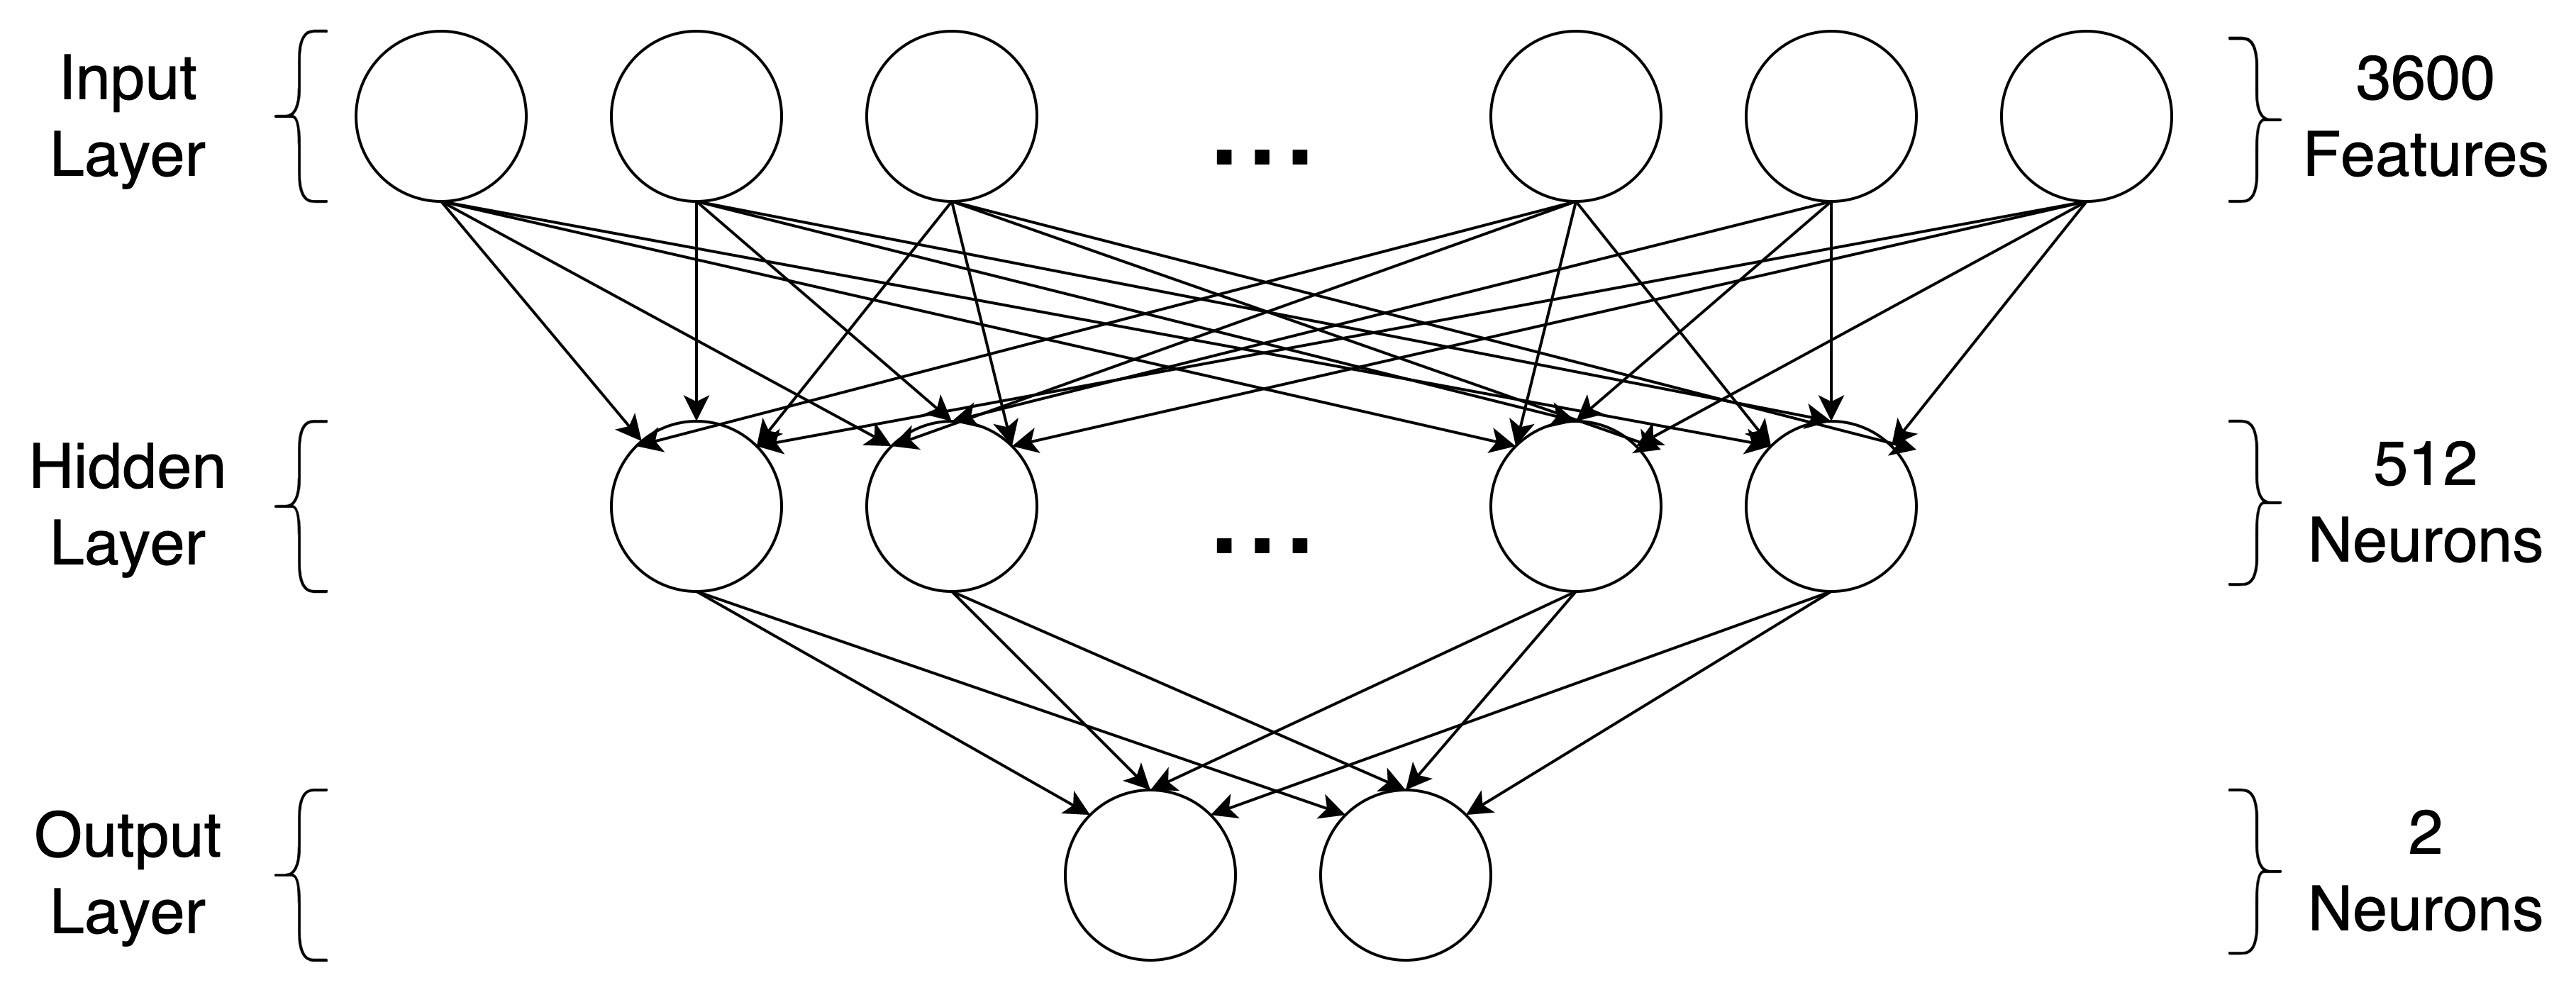

### Activation Functions

There are 2 activation functions the neural network uses:<br>
1. **ReLU Function** - Used in the output of the hidden layer.
2. **Sigmoid Function** - Used in the output of the output layer.

### Learning Mechanism and Optimization

**Train vs Validation Batches Ratio:** We use **8** batches which we separate to **4** train batches and **4** validation batches - **0.5** ratio.

The loss is done by _**Binary Cross-Entropy Loss**_ calculation.

> ### Binary Cross-Entropy Loss
The binary crossentropy loss function calculates the loss of an example by computing the following average:<br>
$$\mathrm{Loss} = - \frac{1}{\mathrm{output \atop size}} \sum_{i=1}^{\mathrm{output \atop size}} y_i \cdot \mathrm{log}\; {\hat{y}}_i + (1-y_i) \cdot \mathrm{log}\; (1-{\hat{y}}_i)$$
Where $\hat{y}_i$ is the ii-th scalar value in the model output, $y_{i}$ is the corresponding target value, and output size is the number of scalar values in the model output.<br>
This is equivalent to the average result of the categorical crossentropy loss function applied to many independent classification problems, each problem having only two possible classes with target probabilities $y_{i}$ and $(1-y_{i})$.

As recommended by many uses, **Sigmoid Activation Function** works very nice with **Binary Cross-Entropy** and therefore used before passing the output of the output layer.

**L1 & L2 Regularization** - We use L2 Regularization in the hidden layer to penalize the model to avoid overfitting (Regularization controls the model complexity by penalizing higher terms in the model).<br>
We found out it helps the model to avoid overfitting better than using both L1 and L2.

> ### L2 Regularization
It is also called regularization for simplicity. If we take the model complexity as a function of weights, the complexity of a feature is proportinal to the absolute value of its weight.<br><br>
L2 regularization forces weights toward zero but it does not make them exactly zero.<br>
It acts like a force that removes a small percentage of weights at each iteration, therefore, weights will never be equal to zero.<br>
_**L2 regularization is actually penalizes (weight)²**_.<br>
There is an additional parameter to tune the L2 regularization term which is called _Regularization Rate_ (lambda).<br>
Regularization rate is a scalar and multiplied by L2 regularization term.<br><br>
**L2 Weight Regularization:**<br>
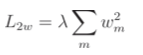<br>
**L2 Bias Regularization:**<br>
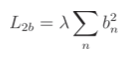<br>

The regularization also used with the overall loss calculation, as the following formula to the overall loss is used in the model (but the L1 regularization is omitted because we decide not to use it - even as it supported in the model implementation):
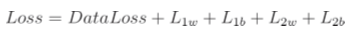

The L2 Regularization rates that we use are:<br>
**L2 Weight Regularization Rate:** $0.0005$<br>
**L2 Bias Regularization Rate:** $0.0005$

For the backpropagation optimizer, we use _**ADAM (Adaptive Momentum)**_.

> ### ADAM (Adaptive Momentum)
Adam optimizer involves a combination of two gradient descent methodologies:<br>
> * _**Momentum -**_ This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace.<br>
The weight change is calculated as:<br>
$$w_{t+1}=w_{t}-\alpha m_{t}$$
$$m_{t}=\beta m_{t-1}+(1-\beta)\left[\frac{\delta L}{\delta w_{t}}\right]$$
_Where:_<br>
$m_{t}$ = Aggregate of gradients at time t [current] (initially, mt = 0)<br>
$m_{t-1}$ = Aggregate of gradients at time t-1 [previous]<br>
$w_{t}$ = Weights at time t<br>
$w_{t+1}$ = Weights at time t+1<br>
$\alpha t$ = Learning rate at time t<br>
$\delta L$ = Derivative of Loss Function<br>
$\delta W_{t}$ = Derivative of weights at time t<br>
$\beta$ = Moving average parameter (const, 0.9)<br>
<br><br>
> * _**Root Mean Square Propagation (RMSP):**_ - Root mean square prop or RMSprop is an adaptive learning algorithm that tries to improve AdaGrad. Instead of taking the cumulative sum of squared gradients like in AdaGrad, it takes the ‘exponential moving average’.<br>
The formula for the learn mechanism:<br>
$$w_{t+1}=w_{t}-\frac{\alpha_{t}}{\left(v_{t}+\varepsilon\right)^{1 / 2}} *\left[\frac{\delta L}{\delta w_{t}}\right]$$
$$v_{t}=\beta v_{t-1}+(1-\beta) *\left[\frac{\delta L}{\delta w_{t}}\right]^{2}$$
_Where:_<br> 
$w_{t}$ = Weights at time t<br>
$w_{t+1}$ = Weights at time t+1<br>
$\alpha t$ = Learning rate at time t<br>
$\delta L$ = Derivative of Loss Function<br>
$\delta w_{t}$ = Derivative of weights at time t<br>
$v_{t}$ = Sum of square of past gradients. [i.e $\sum(\frac{\delta L}{\delta w_{t-1}})$] (initially, $v_{t} = 0$)<br>
$\beta$ = Moving average parameter (const, 0.9)<br>
$\epsilon$ = A small positive constant ( $10^{-8}$ )<br>
<br><br>
Adam Optimizer inherits the positive attributes of the above two methods and builds upon them to give a more optimized gradient descent.<br><br>
Taking the formulas used in the above two methods, we get:<br>
$$m_{t}=\beta_{1} m_{t-1}+\left(1-\beta_{1}\right)\left[\frac{\delta L}{\delta w_{t}}\right] v_{t}=\beta_{2} v_{t-1}+\left(1-\beta_{2}\right)\left[\frac{\delta L}{\delta w_{t}}\right]^{2}$$<br>
_Where:_<br>
$\epsilon$ = A small positive constant to avoid 'division by 0' error when ($v_{t} \rightarrow 0$). ($10^{-8}$)<br>
$\beta _{1}, \beta _{2}$ = Decay rates of average of gradients in the above two methods. ($\beta _{1} = 0.9, \beta _{2} = 0.999$)<br>
$\alpha$ — Step size parameter / learning rate (0.001)<br>
<br>
Since $m_{t}$ and $v_{t}$ have both initialized as 0 (based on the above methods), it is observed that they gain a tendency to be ‘biased towards 0’ as both $\beta _{1}, \beta _{2} ≈ 1$.<br>
This Optimizer fixes this problem by computing ‘bias-corrected’ $m_{t}$ and $v_{t}$.<br>
This is also done to control the weights while reaching the global minimum to prevent high oscillations when near it.<br>
The formulas used are:<br>
$$\widehat{m_{t}}=\frac{m_{t}}{1-\beta_{1}^{t}} \widehat{v}_{t}=\frac{v_{t}}{1-\beta_{2}^{t}}$$<br>
Intuitively, we are adapting to the gradient descent after every iteration so that it remains controlled and unbiased throughout the process, hence the name Adam.<br>
Now, instead of our normal weight parameters $m_{t}$ and $v_{t}$ , we take the bias-corrected weight parameters $\widehat{m}_{t}$ and $\widehat{v}_{t}$.<br>
Putting them into our general equation, we get:<br>
$$w_{t+1}=w_{t}-\widehat{m_{t}}\left(\frac{\alpha}{\sqrt{\widehat{v_{t}}}+\varepsilon}\right)$$


The parameters we use in the **ADAM** optimizer, are:<br>
_**Learning Rate:**_ $0.00035$<br>
_**Learning Rate Decay:**_ $0.00000004$<br>
_**Epsilon:**_ $0.0000001$<br>

## Loss Graph over Epochs (Train VS Validation)

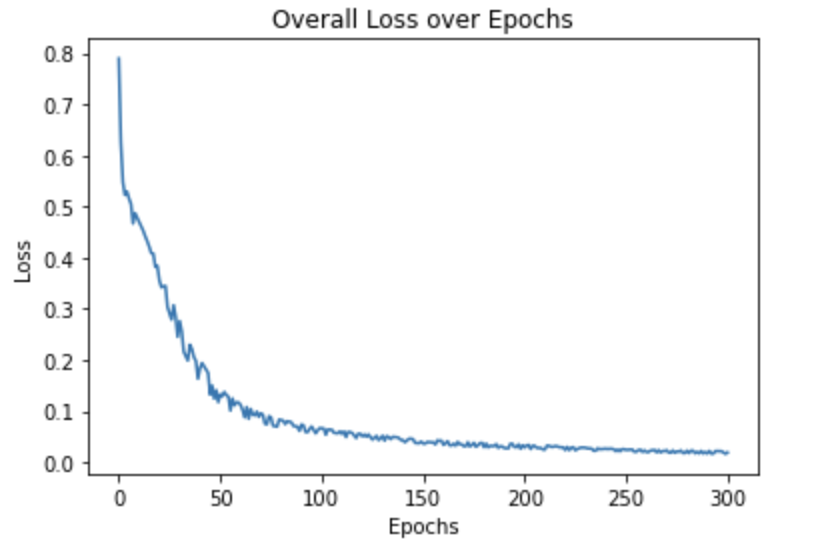

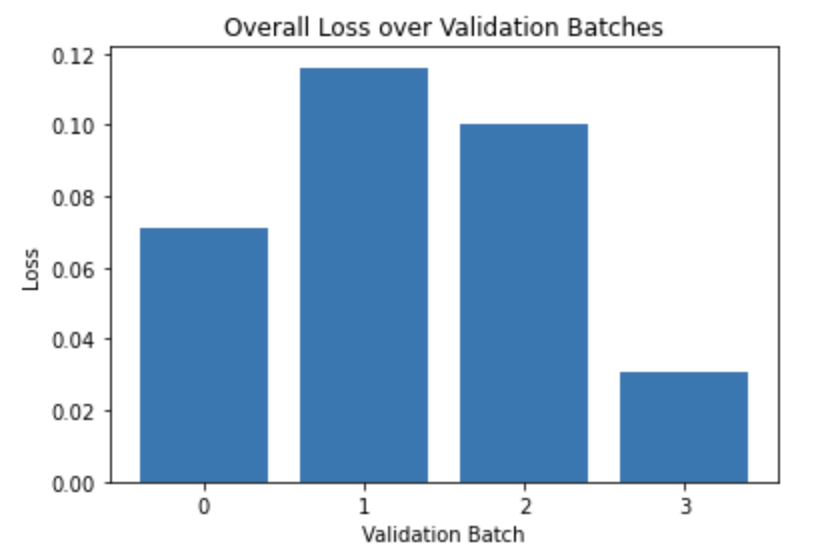

### Did the network overfit to the dataset?

In the beginning, before using **L2 Regularization** and separation of the batches with randomization - yes, the network indeed overfit to the dataset.<br>
But now, after applying the above changes, the network seems to not overfit too much.

### Configurations that misclassified correctly

Configuration that classified as _**Oscillator**_:<br>
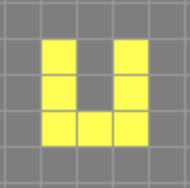

We think the reason behind the missclassification in the above case is that it contains pattern that considered to belong to an oscillator.<br>
The 3 cells line (bottom line) considered to be oscillator when configured alone.<br>
We think the certainty of the model depenes on such patterns and therefore decided that it should be also oscillator.

Configuration that classified as _**Non Oscillators**_:<br>
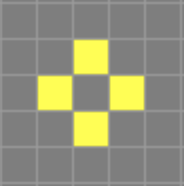

We think the reason behind the missclassification in the above case is that it considered to be oscillator because it does not change at all - meaning it returning to its first state because it is the only state it has.<br>
The network maybe classifies such configurations as non oscillators, but it is very hard to prove.<br>
Another assumption that can be taken, is that not many oscillators have such pattern, which contains an infinite state condition. Most of the oscillators the network learned, have patterns that will change eventually.

### Results of changing all activation functions to binary functions

The results of chaning all activation functions to binary functions is that the learning algorithm cannot improve it state from epoch to epoch because the data perspective is very limited.<br>
Binary activation functions reduce the information the data tells about certain results.<br>
Instead of telling probability of classification, that shows how much the model is certain that the classification is one of the two, it only return the higher classification results, meaning we cannot tweak the parameters until major turnover will be performed.<br>
Also, the duration of the backpropagation will be much longer and need much more data to acheive actual learning capabilites, because the information it can relay on is very limited.